In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('E:\Machine Learning\Projects in Ineuron\Civil Project\concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Observation

1.It shows that there are 8 independent variables (cement,slag,ash,water,superplastic,coarseagg,fineagg,age) and one
  dependent variable (strength)
 
2.All the records are Numeric.

In [3]:
df=df.rename(columns={'blast_furnace_slag':'slag','fly_ash':'ash','superplasticizer':'superplastic',
                     'coarse_aggregate':'coarseagg','fine_aggregate ':'fineagg',
                     'concrete_compressive_strength':'strength'})

In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [6]:
df.shape

(1030, 9)

In [7]:
#checking for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


1.It gives the descreptive statistics (mean,median,percentiles,standard deviation,min,max) and count of columns.

2.we can see cement,slag,ash are left skewed.

# Exploratory data analysis

# cement

In [9]:
#Quartiles
from scipy import stats

Q1=df['cement'].quantile(0.25)
Q3=df['cement'].quantile(0.75)
print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is: ',stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interquartile range (IQR) is:  157.625


In [10]:
#Outlier detection from Interquartile range(IQR) in orginal
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers limit in cement: ',L_outliers)
print('Upper outliers limit in cement: ',U_outliers)

Lower outliers limit in cement:  -44.0625
Upper outliers limit in cement:  586.4375


In [11]:
#Checking for presence of outliers with upper and lower limits
print('Number of outliers in cement upper: ',df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower: ',df[df['cement']<-44.0625]['cement'].count())

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


<AxesSubplot:xlabel='cement'>

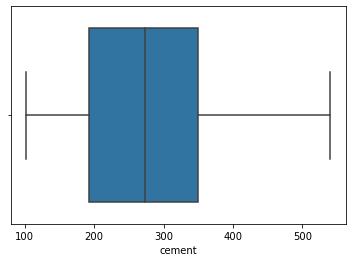

In [12]:
#Distribution of CEMENT
sns.boxplot(x='cement',data=df,orient='h')

Text(0.5, 1.0, 'Ash')

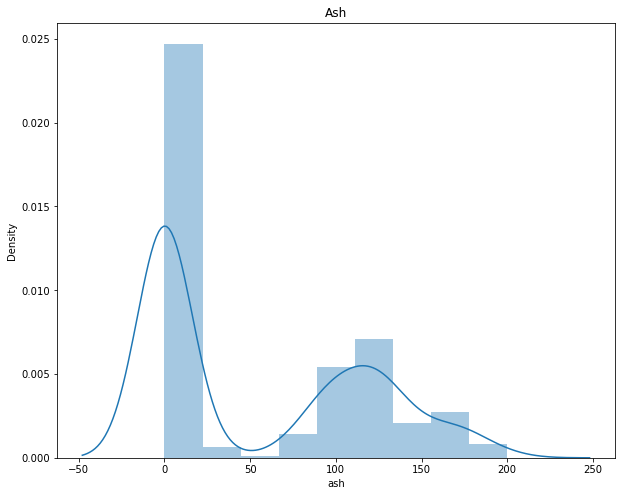

In [13]:
#distplot
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title('Ash')

# Water

In [14]:
w_Q1=df['water'].quantile(0.25)
w_Q3=df['water'].quantile(0.75)
print('1st Quartile (Q1) is: ',w_Q1)
print('3rd Quartile (Q3) is: ',w_Q3)
print('Interquartile range (IQR) is: ',stats.iqr(df['water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [15]:
#Outlier detection from Interquartile range(IQR) in orginal
WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)
print('Lower outliers limit in water: ',WL_outliers)
print('Upper outliers limit in water: ',WU_outliers)

Lower outliers limit in water:  124.25000000000001
Upper outliers limit in water:  232.64999999999998


In [16]:
#Checking for presence of outliers with upper and lower limits
print('Number of outliers in water upper: ',df[df['water']>232.65]['water'].count())
print('Number of outliers in water lower: ',df[df['water']<124.25]['water'].count())

Number of outliers in water upper:  4
Number of outliers in water lower:  5


<AxesSubplot:xlabel='water'>

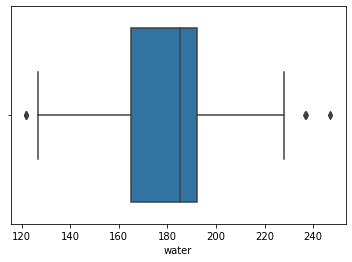

In [17]:
#Distribution of WATER
sns.boxplot(x='water',data=df,orient='h')

Text(0.5, 1.0, 'water')

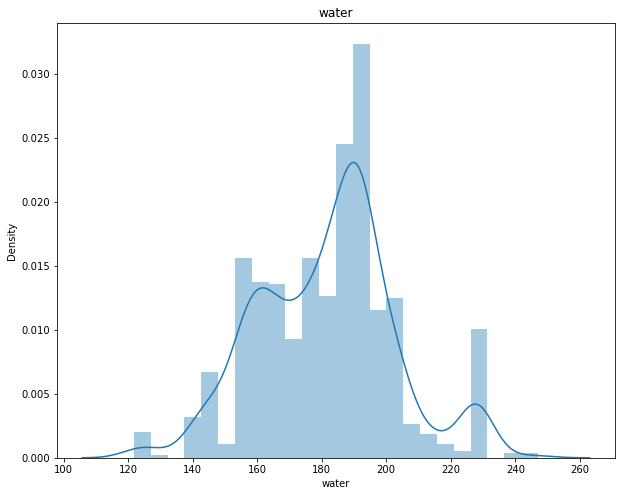

In [18]:
#distplot
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title('water')

# Slag

In [19]:
s_Q1=df['slag'].quantile(0.25)
s_Q3=df['slag'].quantile(0.75)
print('1st Quartile (Q1) is: ',s_Q1)
print('3rd Quartile (Q3) is: ',s_Q3)
print('Interquartile range (IQR) is: ',stats.iqr(df['slag']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  142.95
Interquartile range (IQR) is:  142.95


In [20]:
#Outlier detection from Interquartile range(IQR) in orginal
SL_outliers=s_Q1-1.5*(s_Q3-s_Q1)
SU_outliers=s_Q3+1.5*(s_Q3-s_Q1)
print('Lower outliers limit in cement: ',SL_outliers)
print('Upper outliers limit in cement: ',SU_outliers)

Lower outliers limit in cement:  -214.42499999999998
Upper outliers limit in cement:  357.375


In [21]:
#Checking for presence of outliers with upper and lower limits
print('Number of outliers in slag upper: ',df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower: ',df[df['slag']<-214.425]['slag'].count())

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0


<AxesSubplot:xlabel='slag'>

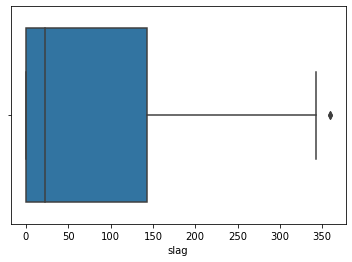

In [22]:
#Distribution of WATER
sns.boxplot(x='slag',data=df,orient='h')

Text(0.5, 1.0, 'Slag')

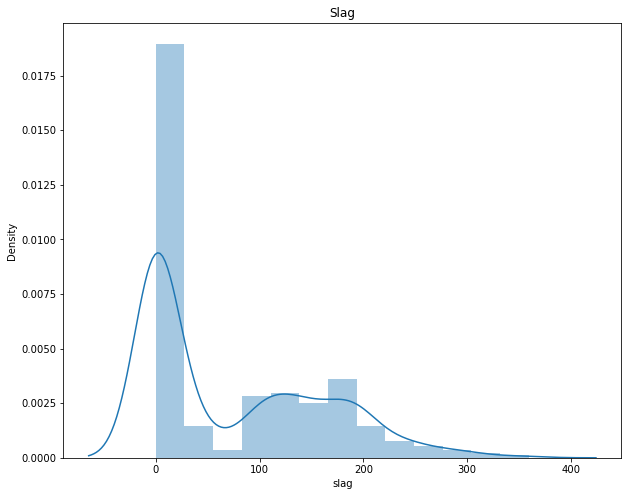

In [23]:
#distplot
plt.figure(figsize=(10,8))
sns.distplot(df['slag']).set_title('Slag')

# Age

In [24]:
a_Q1=df['age'].quantile(0.25)
a_Q3=df['age'].quantile(0.75)
print('1st Quartile (Q1) is: ',a_Q1)
print('3rd Quartile (Q3) is: ',a_Q3)
print('Interquartile range (IQR) is: ',stats.iqr(df['age']))

1st Quartile (Q1) is:  7.0
3rd Quartile (Q3) is:  56.0
Interquartile range (IQR) is:  49.0


In [25]:
#Outlier detection from Interquartile range(IQR) in orginal
AL_outliers=a_Q1-1.5*(a_Q3-a_Q1)
AU_outliers=a_Q3+1.5*(a_Q3-a_Q1)
print('Lower outliers limit in cement: ',AL_outliers)
print('Upper outliers limit in cement: ',AU_outliers)

Lower outliers limit in cement:  -66.5
Upper outliers limit in cement:  129.5


In [26]:
#Checking for presence of outliers with upper and lower limits
print('Number of outliers in age upper: ',df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower: ',df[df['age']<-66.5]['age'].count())

Number of outliers in age upper:  59
Number of outliers in age lower:  0


<AxesSubplot:xlabel='age'>

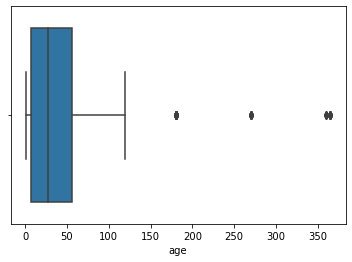

In [27]:
#Distribution of AGE
sns.boxplot(x='age',data=df,orient='h')

Text(0.5, 1.0, 'Age')

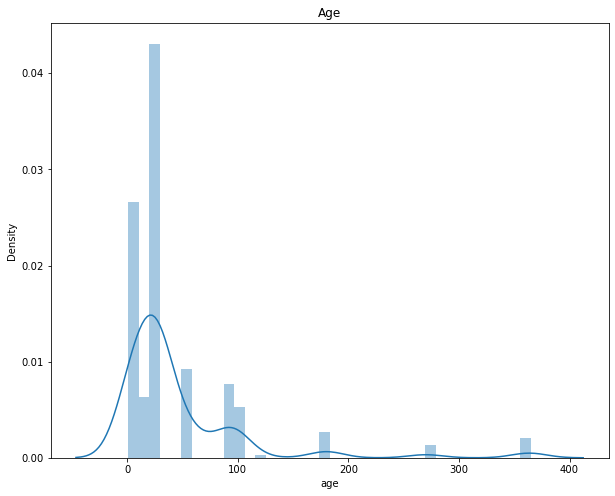

In [28]:
#distplot
plt.figure(figsize=(10,8))
sns.distplot(df['age']).set_title('Age')

# Ash

In [29]:
ash_Q1=df['ash'].quantile(0.25)
ash_Q3=df['ash'].quantile(0.75)
print('1st Quartile (Q1) is: ',ash_Q1)
print('3rd Quartile (Q3) is: ',ash_Q3)
print('Interquartile range (IQR) is: ',stats.iqr(df['ash']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  118.3
Interquartile range (IQR) is:  118.3


In [30]:
#Outlier detection from Interquartile range(IQR) in orginal
AL_outliers=ash_Q1-1.5*(ash_Q3-ash_Q1)
AU_outliers=ash_Q3+1.5*(ash_Q3-ash_Q1)
print('Lower outliers limit in cement: ',AL_outliers)
print('Upper outliers limit in cement: ',AU_outliers)

Lower outliers limit in cement:  -177.45
Upper outliers limit in cement:  295.75


In [31]:
#Checking for presence of outliers with upper and lower limits
print('Number of outliers in ash upper: ',df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower: ',df[df['ash']<-177.45]['ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<AxesSubplot:xlabel='ash'>

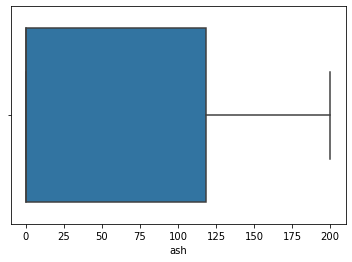

In [32]:
#Distribution of ASH
sns.boxplot(x='ash',data=df,orient='h')

Text(0.5, 1.0, 'Ash')

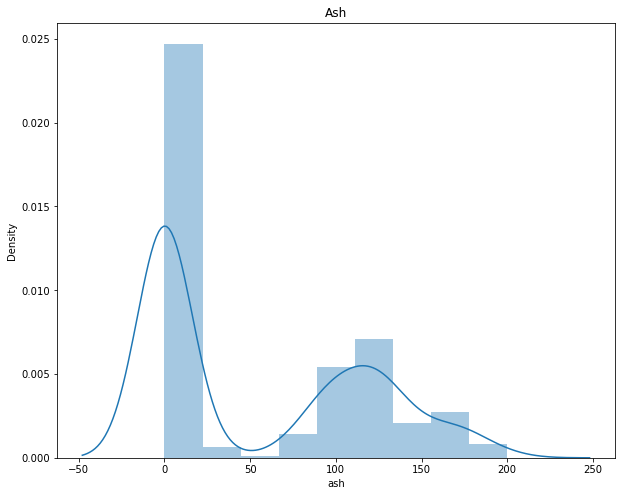

In [33]:
#distplot
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title('Ash')

# MultiVariate Analysis

<AxesSubplot:xlabel='strength', ylabel='Density'>

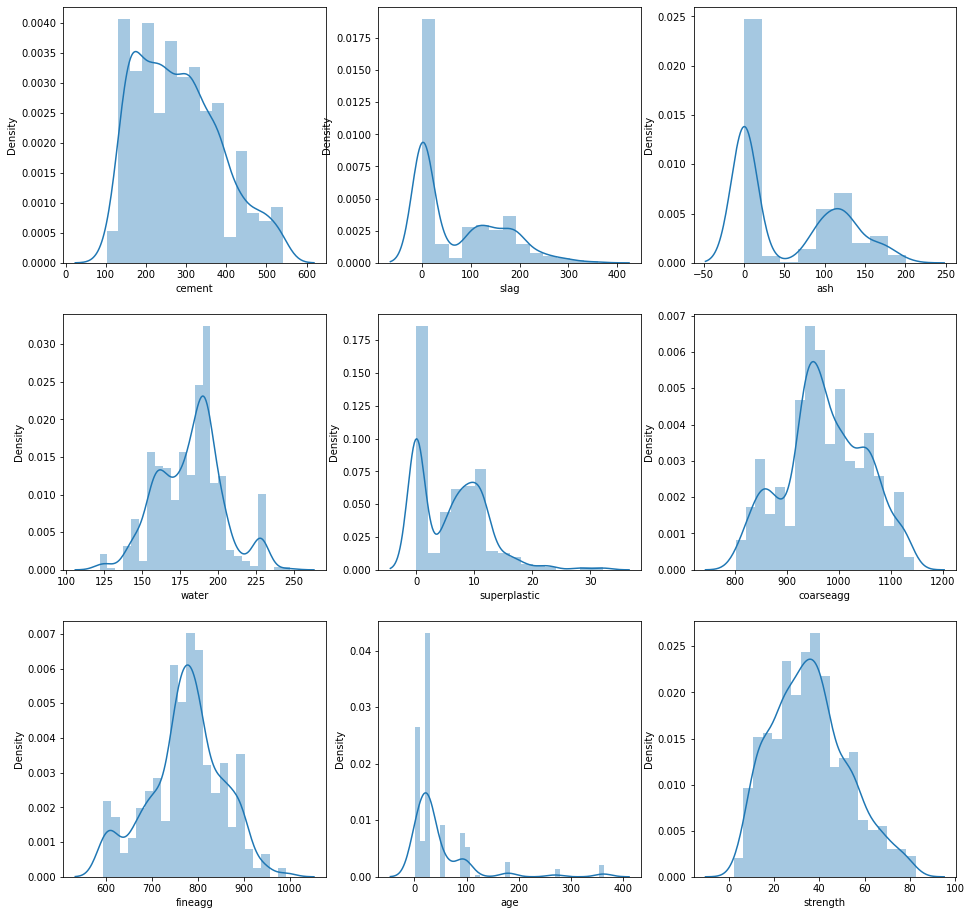

In [34]:
#Distplot
fig,ax2=plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fineagg'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

observations:

cement is almost normal

slag has three gaussian and right skewed

ash has two guassian and right skewed

water has three guassian and slightly left skewed

superplastic has two guassian and right skewed

coarseagg has three guasian and almost normal

fineagg has almost two guassian and looks like normal

age has multiple guassian and rightly skewed

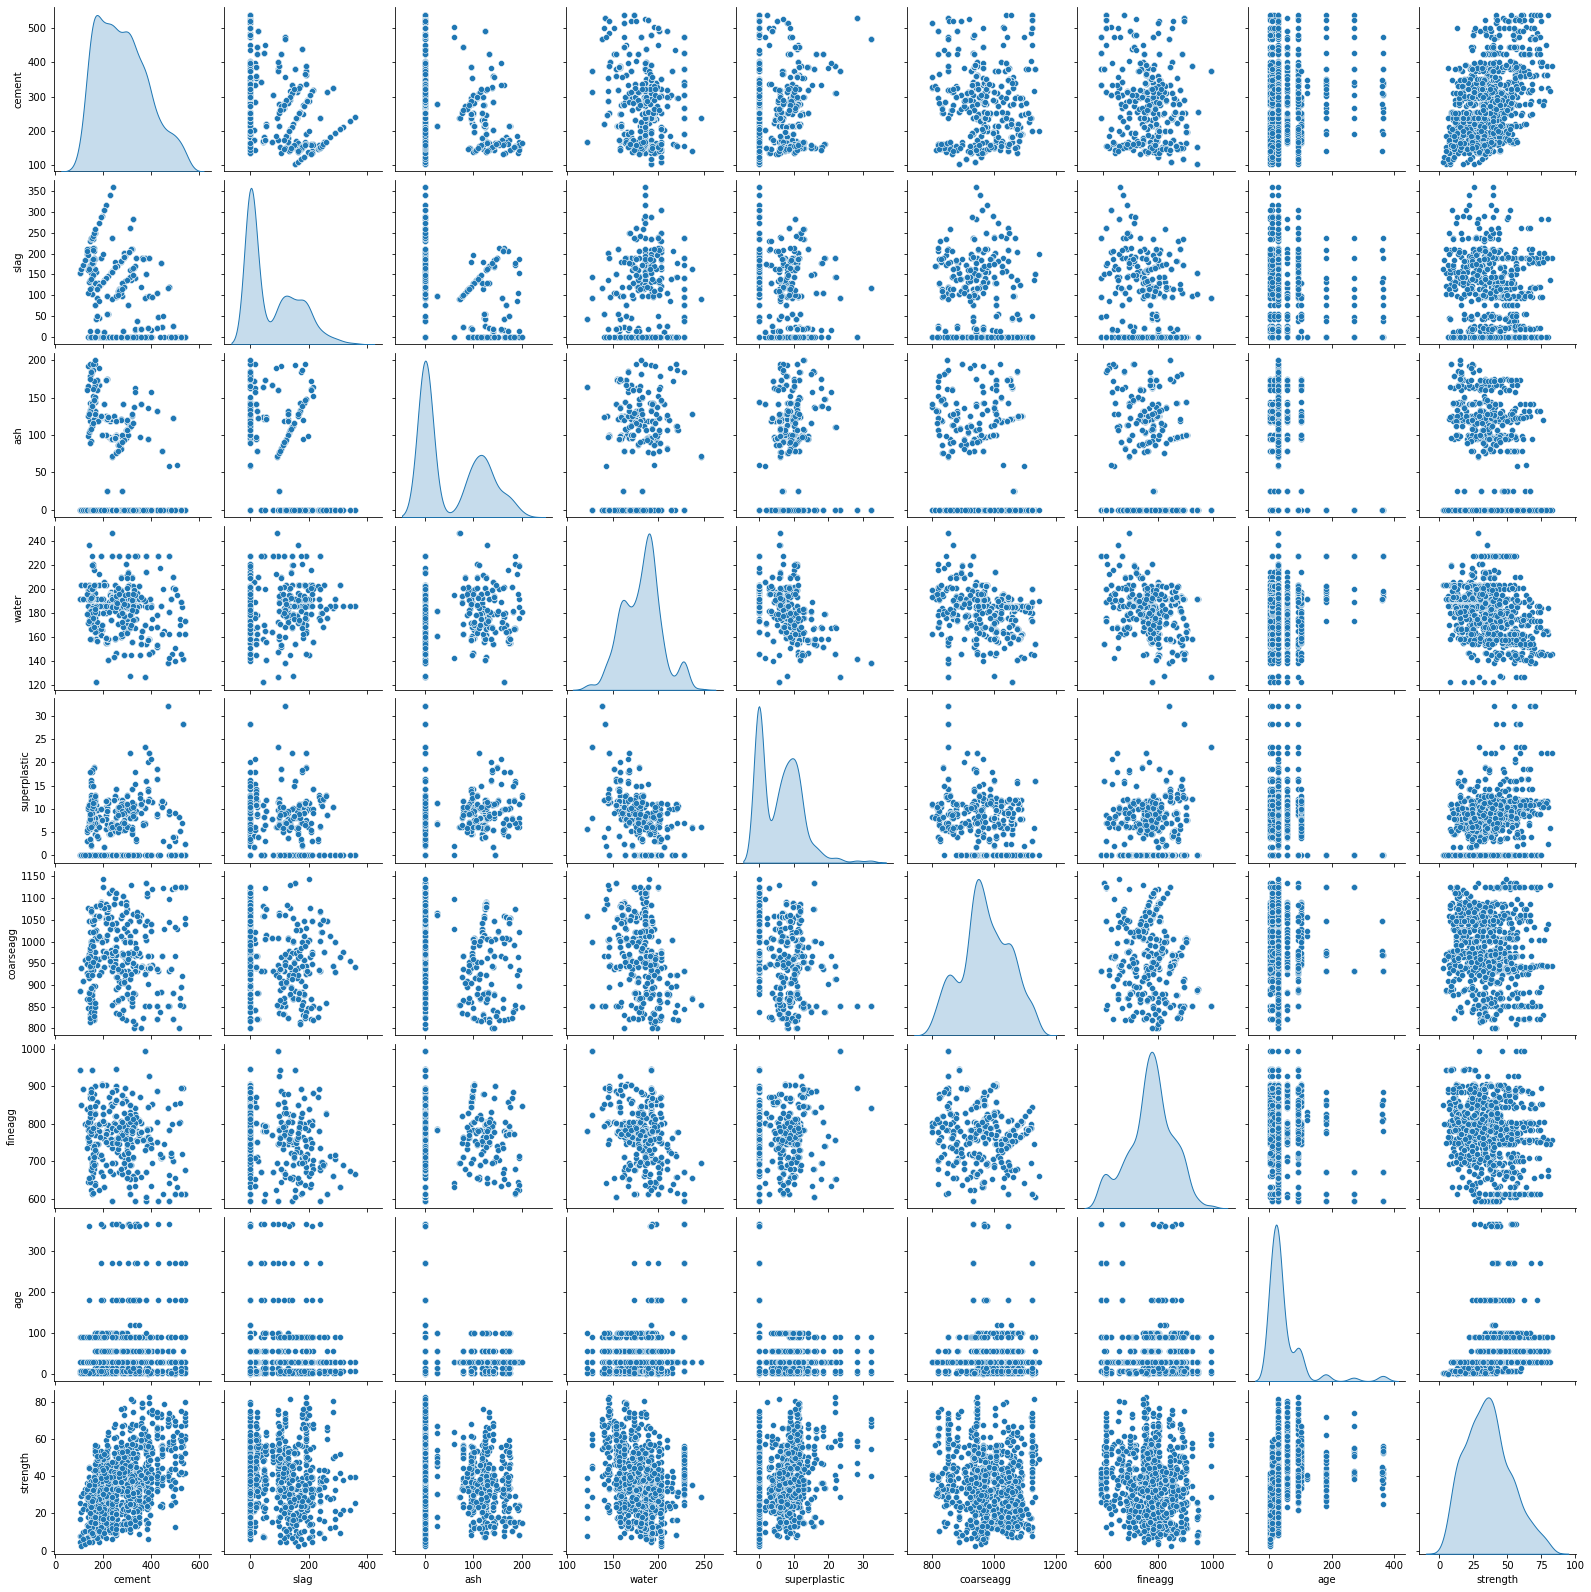

In [35]:
## pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(df,diag_kind='kde')

# Correlation between Variables

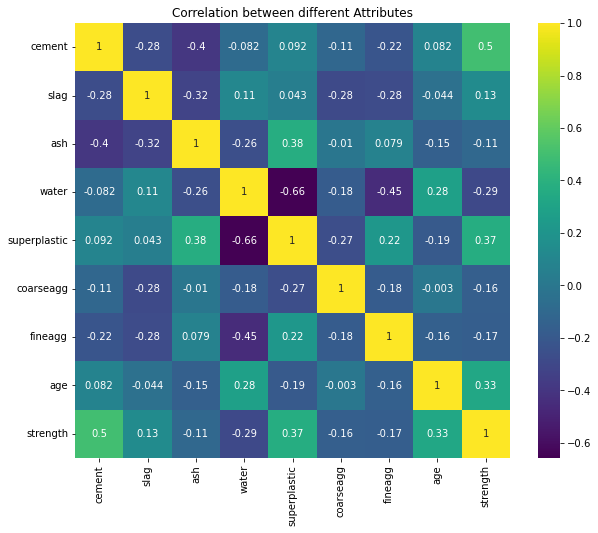

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title('Correlation between different Attributes')
plt.show()

<AxesSubplot:>

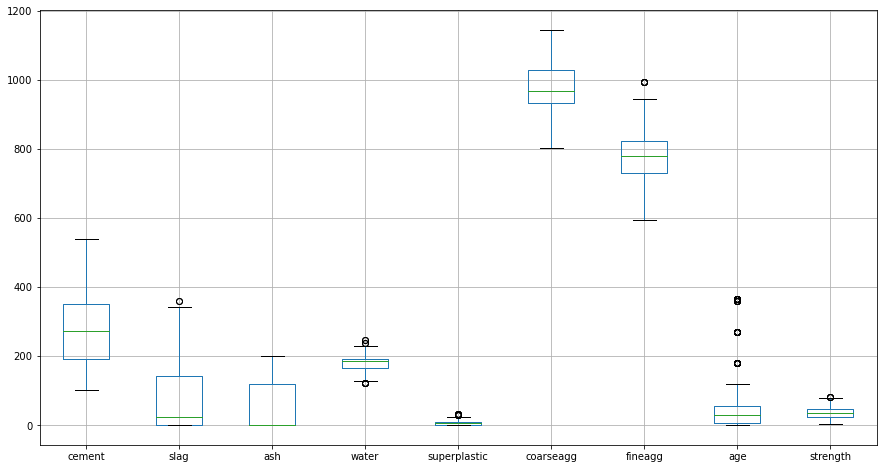

In [37]:
df.boxplot(figsize=(15,8))

# checking for outliers

In [38]:
print('Outliers in cement: ',df[((df.cement-df.cement.mean())/df['cement'].std()).abs()>3]['cement'].count())
print('Outliers in slag: ',df[((df.slag-df.slag.mean())/df['slag'].std()).abs()>3]['slag'].count())
print('Outliers in ash: ',df[((df.ash-df.ash.mean())/df['ash'].std()).abs()>3]['ash'].count())
print('Outliers in water: ',df[((df.water-df.water.mean())/df['water'].std()).abs()>3]['water'].count())
print('Outliers in superplastic: ',df[((df.superplastic-df.superplastic.mean())/df['superplastic'].std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ',df[((df.coarseagg-df.coarseagg.mean())/df['coarseagg'].std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ',df[((df.fineagg-df.fineagg.mean())/df['fineagg'].std()).abs()>3]['fineagg'].count())
print('Outliers in age: ',df[((df.age-df.age.mean())/df['age'].std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


# Replace outliers by median

In [39]:
for cols in df.columns[:-1]:
    Q1=df[cols].quantile(0.25)
    Q3=df[cols].quantile(0.75)
    IQR=Q3-Q1
    low=Q1-1.5*IQR
    high=Q3+1.5*IQR
    df.loc[(df[cols]<low) | (df[cols]>high),cols]=df[cols].median()

<AxesSubplot:>

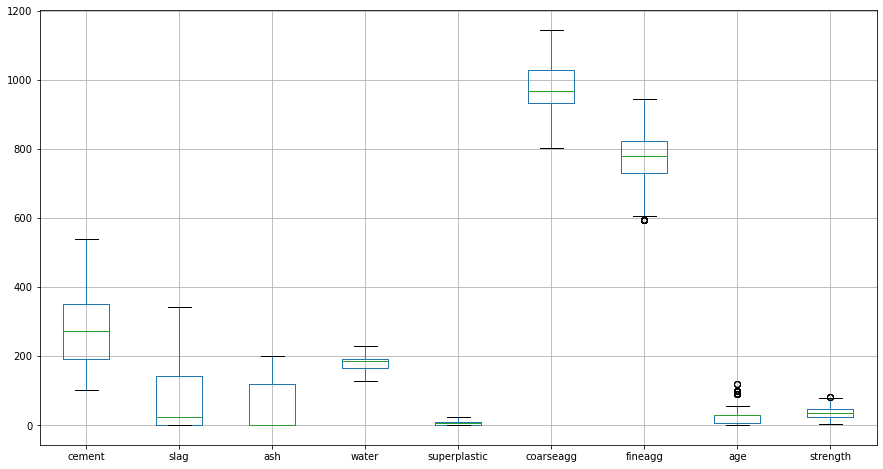

In [40]:
df.boxplot(figsize=(15,8))

# Feature Engineering and Model Building

In [41]:
#Splitting the data into independent and dependent attributes
X=df.drop('strength',axis=1)
y=df['strength']

In [42]:
from scipy.stats import zscore
Xscaled=X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xscaled,y,test_size=0.3,random_state=1)

# Building Different Models

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
y_pred=model.predict(X_test)

In [46]:
y_pred

array([22.3805    , 13.1328    , 23.75393333, 12.8329    , 32.8443575 ,
       62.8625    , 19.998     , 50.40820762, 41.07035714, 19.0797    ,
       36.9814    , 14.2276    , 39.67216   , 32.83110667, 11.8244    ,
       28.7098    , 35.2201106 , 54.9454    , 59.9207    , 31.165     ,
       25.3206    , 50.7352    , 16.8521    , 62.4204    , 63.1681    ,
       43.78224   , 33.9478    , 30.8964    , 34.72997143, 12.6061    ,
       39.23124762, 51.595685  , 27.75014   , 20.2635    , 35.4938    ,
       37.8919    , 15.849     , 26.63158833, 24.4514    , 10.813     ,
       32.9141    , 15.2433    , 47.10535   , 37.098     , 31.3905    ,
       27.4117    , 32.48343333, 23.4282    , 33.94361   , 49.9278    ,
       27.38823333, 35.91103333, 61.1837    , 53.74276667, 59.65920833,
        9.1375    , 30.6839    , 22.6833    , 31.9594    , 44.1341    ,
       45.74885298, 39.91626333, 49.4593    , 49.4973    , 26.0376    ,
       34.407865  , 61.1837    , 38.6916    , 49.00989   , 27.41

In [47]:
#Model performance on Training Data
model.score(X_train,y_train)

0.9814236952766223

In [48]:
#Model performance on Testing Data
model.score(X_test,y_test)

0.8790838584782289

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
acc_R=r2_score(y_test,y_pred)
acc_R

0.8790838584782289

In [51]:
mean_squared_error(y_test,y_pred)

31.692991169781273

In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': acc_R},index={'1'})
results = results_1[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084


# KFold Cross Validation

In [53]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
k = 20
kfold = KFold(n_splits=k)
K_results = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.760697588877141

In [54]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index={'2'})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698


# Gradient Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [56]:
y_pred = model.predict(X_test)

In [57]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.9477368610390589

In [58]:
#Model Performance on Test Data

model.score(X_test, y_test)

0.8802273926115929

In [59]:
#Same as above, you can also store the above in a variable and use without doing the following.
acc_G=r2_score(y_test, y_pred)
acc_G

0.8802273926115929

In [60]:
mean_squared_error(y_test, y_pred)

31.393262641109008

In [61]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G},index={'3'})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227


In [62]:
k = 20
kfold = KFold(n_splits=k)
results_3 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_3))
accuracy

0.7711838671006879

In [63]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index={'4'})
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184


# Ada Boost Regressor

In [64]:
from sklearn.ensemble import AdaBoostRegressor

In [65]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [66]:
y_pred = model.predict(X_test)

In [67]:
#Model Performance on Test Data, NB: check on train data

model.score(X_test, y_test)

0.7615408776767585

In [68]:
#Same as above, you can also store the above in a variable and use without doing the following.
acc_Ada=r2_score(y_test, y_pred)
acc_Ada

0.7615408776767585

In [69]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_Ada},index={'5'})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541


# K fold cross Validation for Ada Boost

In [70]:
k = 20
kfold = KFold(n_splits=k)
results_4 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_4))
accuracy

0.5838884104949694

In [71]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': accuracy},index={'6'})
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888


# KNN Regressor

In [72]:
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor


diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean errors')

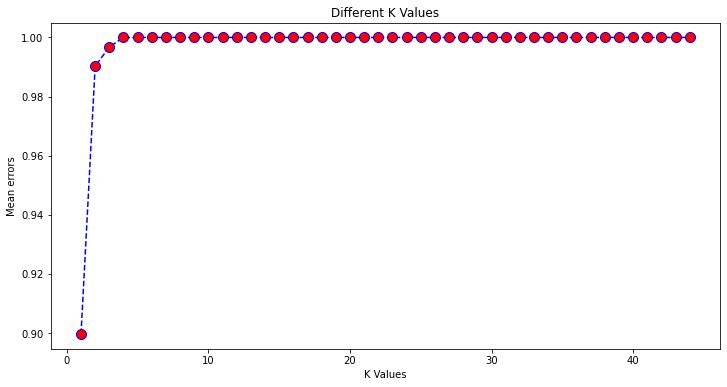

In [73]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [74]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [75]:
y_pred = model.predict(X_test)

In [76]:
model.score(X_train, y_train)

0.9069857173257587

In [77]:
acc_KNN=r2_score(y_test, y_pred)
acc_KNN

0.7538075164015781

In [78]:
mean_squared_error(y_test, y_pred)

64.52882229413879

In [79]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]}, index={'7'})
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808


# KFold validation

In [80]:
k = 20

kfold = KFold(n_splits=k)
results_5 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_5))
accuracy

0.6907963408592752

In [81]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy},index={'8'})
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796


# Bagging Regressor

In [82]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [83]:
y_pred = model.predict(X_test)

In [84]:
model.score(X_train, y_train)

0.9762345462136514

In [85]:
model.score(X_test, y_test)

0.867852681708516

In [86]:
acc_BR=r2_score(y_test, y_pred)
acc_BR

0.867852681708516

In [87]:
mean_squared_error(y_test, y_pred)

34.63676345451524

In [88]:
#Store the accuracy results for each model in a dataframe for final comparison

Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR},index={'9'})
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853


# KFold validation

In [89]:
k = 20
kfold = KFold(n_splits=k)
results_7 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_7))
accuracy

0.7224977253726523

In [90]:
#Store the accuracy results for each model in a dataframe for final comparison

BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index={'10'})
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


# Support vector Regressor

In [91]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [92]:
y_pred = model.predict(X_test)

In [93]:
model.score(X_train, y_train)

0.7296525761559518

In [94]:
acc_SVR=r2_score(y_test, y_pred)
acc_SVR

0.6549962611822544

In [95]:
mean_squared_error(y_test, y_pred)

90.42796363067555

In [96]:
#Store the accuracy results for each model in a dataframe for final comparison

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR},index={'11'})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


# KFold for SVR

In [97]:
k = 20

kfold = KFold(n_splits=k)
results_8 = cross_val_score(model, X, y, cv=kfold)
accuracy=np.mean(abs(results_8))
accuracy

0.6155301658292511

In [98]:
#Store the accuracy results for each model in a dataframe for final comparison

SVRKFold_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor k fold'], 'accuracy': accuracy},index={'12'})
results = pd.concat([results, SVRKFold_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


# XGBoost Regressor

In [99]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [100]:
y_pred = xgr.predict(X_test)

In [101]:
acc_XGB=r2_score(y_test, y_pred)
acc_XGB

0.9004226612596836

In [102]:
mean_squared_error(y_test, y_pred)

26.09993734243447

In [103]:
#Store the accuracy results for each model in a dataframe for final comparison

XGB_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': [acc_XGB]},index={'13'})
results = pd.concat([results, XGB_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


# Decision Tree Regressor

In [104]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [105]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
               Importance
cement          0.308457
slag            0.060341
ash             0.009120
water           0.123780
superplastic    0.047264
coarseagg       0.026360
fineagg         0.051717
age             0.372961


As we see cement,age and water are the most important features

In [106]:
y_pred = dec_model.predict(X_test)

In [107]:
dec_model.score(X_train, y_train)

0.9930841416603411

In [108]:
dec_model.score(X_test, y_test)

0.7673170724882388

In [109]:
acc_DT=r2_score(y_test, y_pred)
acc_DT

0.7673170724882388

In [110]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]},index={'14'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


# KFold for decision Tree Regressor

In [111]:
k = 20

kfold = KFold(n_splits=k)
results_9 = cross_val_score(dec_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

0.5946774079086325

In [112]:
#Store the accuracy results for each model in a dataframe for final comparison

DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor k fold'], 'accuracy': accuracy},index={'15'})
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


# Feature Selection

In [113]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [114]:
X = df2.drop(['strength','ash','coarseagg','fineagg'],axis=1)
y = df2['strength']
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,random_state = 1)

In [115]:
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

In [116]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X_train, y_train)

DecisionTreeRegressor()

In [117]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
               Importance
cement          0.351803
slag            0.075453
water           0.139688
superplastic    0.055695
age             0.377362


In [118]:
y_pred = decNew_Model.predict(X_test)

In [119]:
decNew_Model.score(X_train, y_train)

0.9911889880235539

In [120]:
decNew_Model.score(X_test, y_test)

0.7523585863743224

In [121]:
acc_DT=r2_score(y_test, y_pred)
acc_DT

0.7523585863743224

In [122]:
#Store the accuracy results for each model in a dataframe for final comparison

DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': [acc_DT]},index={'16'})
results = pd.concat([results, DT_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


In [123]:
#Let's create our training and testing data again since it has been overriden

X=df.drop('strength',axis=1)
y=df['strength']

In [124]:
Xscaled=X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=df.columns)

In [125]:
#Split the X and y into training and test set in 70:30 ratio
X_train,X_test, y_train,y_test = train_test_split(Xscaled,y, test_size=0.3,random_state = 1)

In [126]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [127]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
               Importance
cement          0.355615
slag            0.000000
ash             0.000000
water           0.106034
superplastic    0.035409
coarseagg       0.000000
fineagg         0.025055
age             0.477887


# Plotting the Decision Tree

In [128]:
!pip install graphviz

In [129]:
!pip install pydot

In [130]:
pip install six

In [131]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [132]:
Xscaled_df=Xscaled_df.drop('strength',axis=1)
feature_cols = Xscaled_df.columns

In [133]:
feature_cols 

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [146]:
dot_data = StringIO()
export_graphviz(dec_prun_model,out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('concrete_pruned.png')
Image(graph.create_png())

FileNotFoundError: [WinError 2] "dot" not found in path.

In [135]:
y_pred = dec_prun_model.predict(X_test)

In [136]:
#On Training data
dec_prun_model.score(X_train, y_train)

0.7578225840644413

In [137]:
#On testing data

dec_prun_model.score(X_test, y_test)

0.556820999525816

In [139]:
acc_DecT=r2_score(y_test, y_pred)
acc_DecT

0.556820999525816

In [141]:
mean_squared_error(y_test, y_pred)

116.16040647585388

In [142]:
#Store the accuracy results for each model in a dataframe for final comparison

DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree'], 'accuracy': [acc_DecT]},index={'17'})
results = pd.concat([results, DecT_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


# KFold for pruned Decision Tree

In [143]:
k = 20

kfold = KFold(n_splits=k)
results_10 = cross_val_score(dec_prun_model, X, y, cv=kfold)
accuracy=np.mean(abs(results_10))
accuracy

0.44792037352404224

In [144]:
#Store the accuracy results for each model in a dataframe for final comparison

decKFold_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree k fold'], 'accuracy': accuracy},index={'18'})
results = pd.concat([results, decKFold_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
1,Random Forest,0.879084
2,Random Forest Regressor k_fold,0.760698
3,Gradient Boost Regressor,0.880227
4,Gradient Boost Regressor k fold,0.771184
5,Ada Boost Regressor,0.761541
6,Ada Boost Regressor k fold,0.583888
7,KNN Regressor,0.753808
8,KNN Regressor k fold,0.690796
9,Bagging Regressor,0.867853
10,Bagging Regressor k fold,0.722498


Gradient Boost Regressor, Support Vector Regressor, Bagging Regressor and Random Forest seems to do well in the scenario. We can choose either of them.